<a href="https://colab.research.google.com/github/mrymold/Final-Project/blob/main/INSE_6220_project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# use seaborn plotting style defaults
import seaborn as sns; sns.set()

In [2]:
#read cvs file into dataframe
df = pd.read_excel('/content/drive/MyDrive/Dataset.xls', index_col=0)
##!pip install xlrd
##df = pd.read_excel('airquality.xls')
print(df.head())
     

                           X1  X2    X3    X4   X5     X6  X7    X8
chevrolet chevelle malibu   1  70  12.0  3504  130  307.0   8  18.0
buick skylark 320           1  70  11.5  3693  165  350.0   8  15.0
plymouth satellite          1  70  11.0  3436  150  318.0   8  18.0
amc rebel sst               1  70  12.0  3433  150  304.0   8  16.0
ford torino                 1  70  10.5  3449  140  302.0   8  17.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#m,n=df.shape #size of data
#X = df.ix[:,0:n].values # Feature matrix
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X) #normalize data
     
     

In [5]:
#normalize data
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      392 non-null    float64
 1   X2      392 non-null    float64
 2   X3      392 non-null    float64
 3   X4      392 non-null    float64
 4   X5      392 non-null    float64
 5   X6      392 non-null    float64
 6   X7      392 non-null    float64
 7   X8      392 non-null    float64
dtypes: float64(8)
memory usage: 27.6+ KB


Observations and variables

In [6]:
observations = list(df.index)
variables = list(df.columns)

Data Visualisation


Box and Whisker Plots

<Axes: >

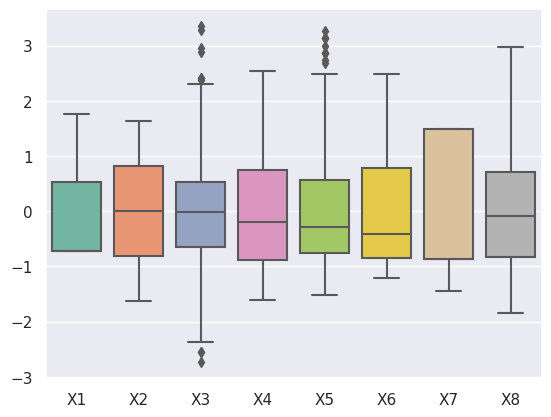

In [7]:
sns.boxplot(data=df, orient="v", palette="Set2")


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 94.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 51.

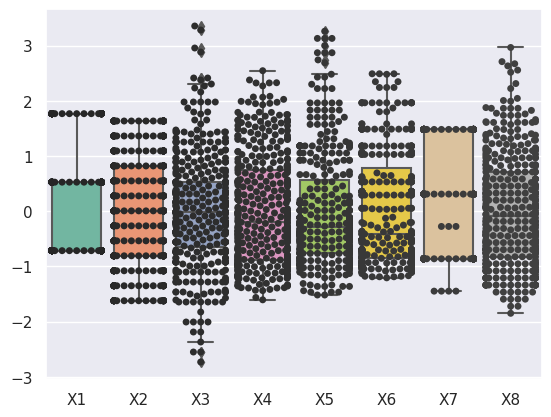

In [8]:
##Use swarmplot() to show the datapoints on top of the boxes:
#plt. figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.swarmplot(data=df, color=".25") 

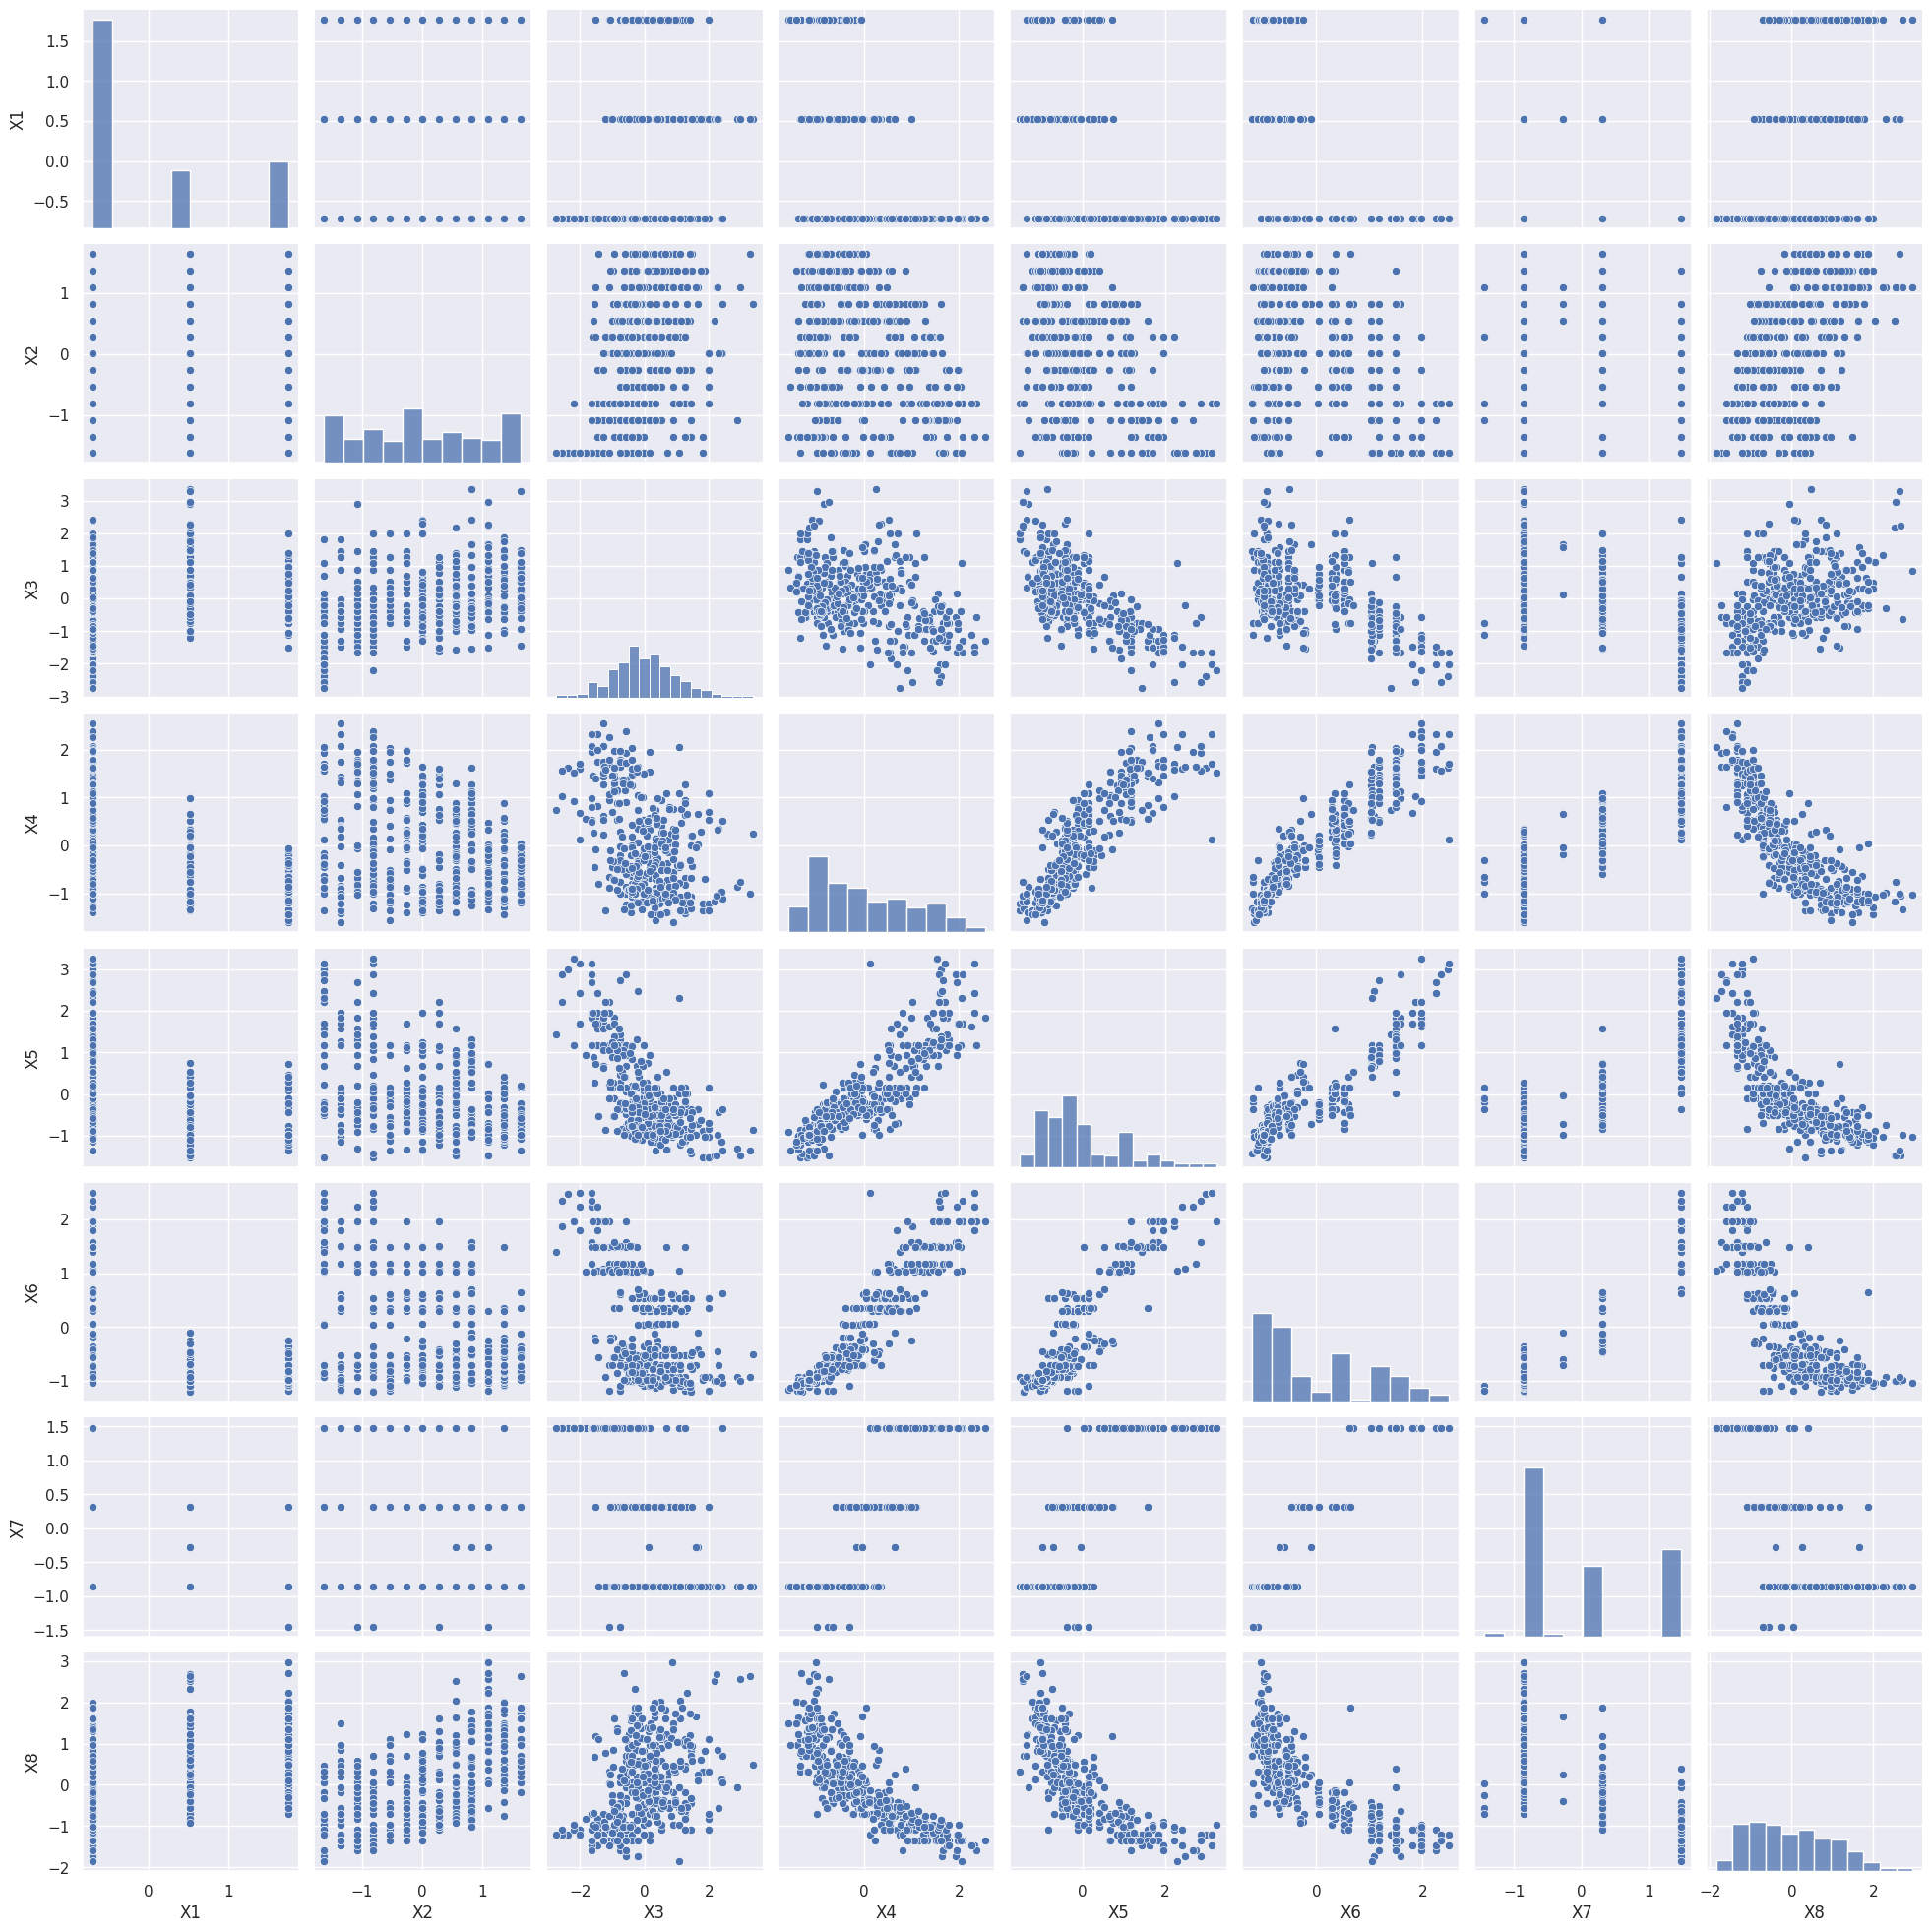

In [ ]:
#pairplot
sns.pairplot(df)

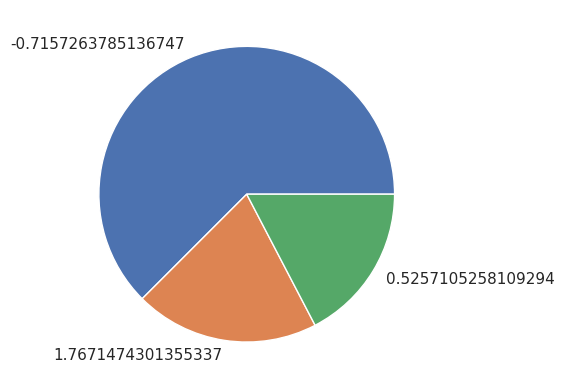

In [10]:
y =df['X1']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [11]:
X = df.drop(columns=['X1'])
X.head(10)

X2        X3        X4        X5        X6  \
chevrolet chevelle malibu -1.623241 -1.283618  0.619748  0.663285  1.075915   
buick skylark 320         -1.623241 -1.464852  0.842258  1.572585  1.486832   
plymouth satellite        -1.623241 -1.646086  0.539692  1.182885  1.181033   
amc rebel sst             -1.623241 -1.283618  0.536160  1.182885  1.047246   
ford torino               -1.623241 -1.827320  0.554997  0.923085  1.028134   
ford galaxie 500          -1.623241 -2.008554  1.605147  2.429924  2.241772   
chevrolet impala          -1.623241 -2.371022  1.620452  3.001484  2.480677   
plymouth fury iii         -1.623241 -2.552256  1.571005  2.871584  2.346890   
pontiac catalina          -1.623241 -2.008554  1.704040  3.131384  2.490234   
amc ambassador dpl        -1.623241 -2.552256  1.027093  2.222085  1.869080   

                                 X7        X8  
chevrolet chevelle malibu  1.482053 -0.697747  
buick skylark 320          1.482053 -1.082115  
plymouth satellite         1.482053 -0.697747  
amc rebel sst              1.482053 -0.953992  
ford torino                1.482053 -0.825870  
ford galaxie 500           1.482053 -1.082115  
chevrolet impala           1.482053 -1.210238  
plymouth fury iii          1.482053 -1.210238  
pontiac catalina           1.482053 -1.210238  
amc ambassador dpl         1.482053 -1.082115

Covariance

Text(0.5, 1.0, 'Covariance matrix')

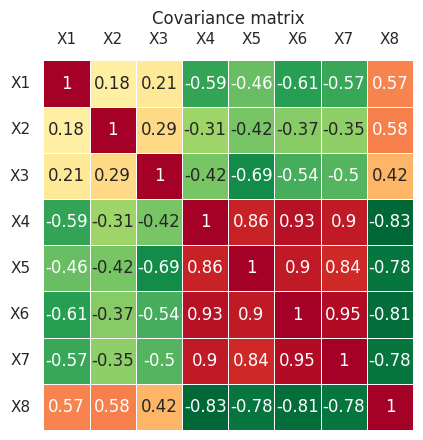

In [ ]:
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Covariance matrix')

Applying PCA (Principal component analysis)

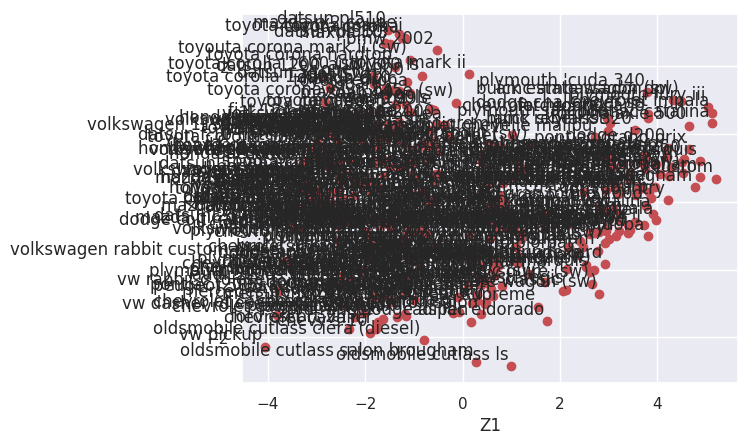

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('Z1')
plt.ylabel('Z2')
for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

Eigenvectors

In [ ]:
X = np.array([23, 4, 29, 44, 47, 24, 40, 23, 23, 44, 33, 27, 60, 46, 61, 11, 23, 62, 31, 44, 77, 14, 65, 42])
#X = np.array([99, 85, 86, 71, 82, 95, 108, 87, 89, 89, 78, 86])
#X = np.array([12, 12, 12, 14, 15, 16, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 20, 
#              20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 23, 23, 24, 24, 25, 26, 26, 28, 28, 28])			  
#X = np.random.poisson(35, 15)

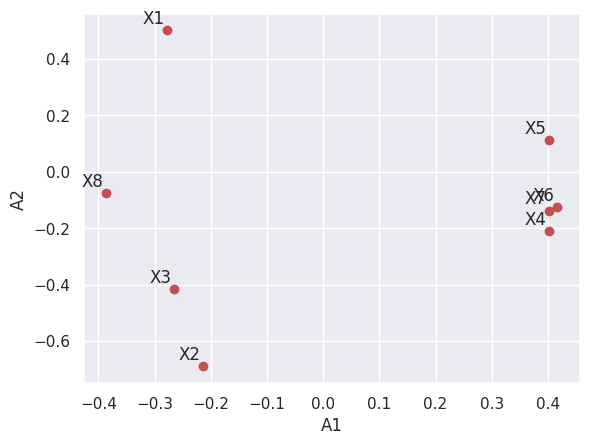

In [ ]:
A = pca.components_.T 
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


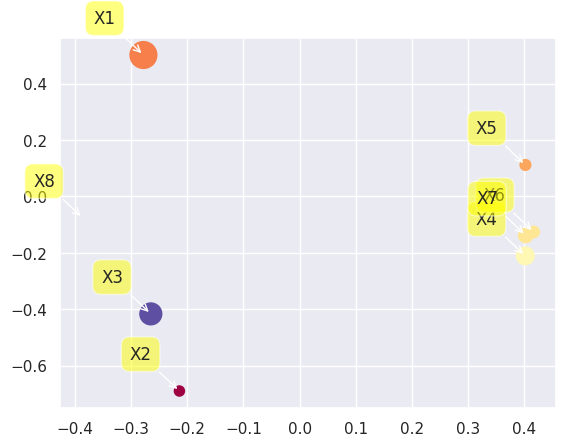

In [ ]:
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
     

Scree plot

Text(0, 0.5, 'Explained variance')

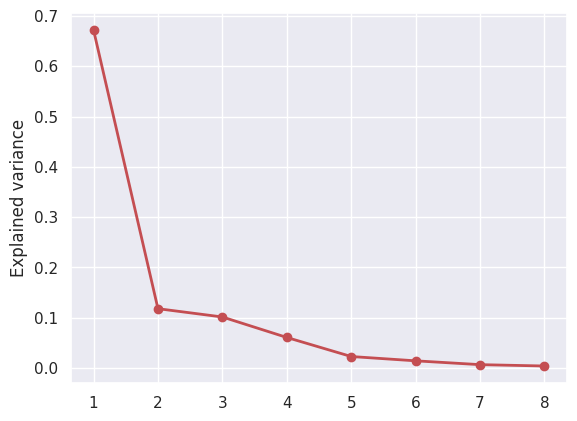

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

Explaiend Variance

Text(0, 0.5, 'Cumulative explained variance')

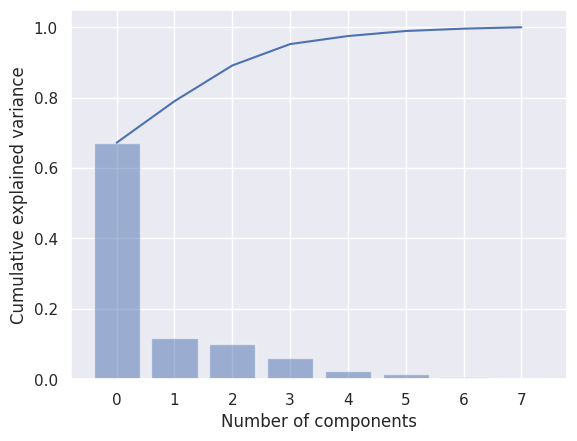

In [ ]:
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
     

Scatter plot

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[colourmap]> Warning: Colormap [tab20c] can not create [301] unique colors! Available unique colors: [20].


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [98.72%] of the variance'}, xlabel='PC1 (71.5% expl.var)', ylabel='PC2 (12.3% expl.var)'>)

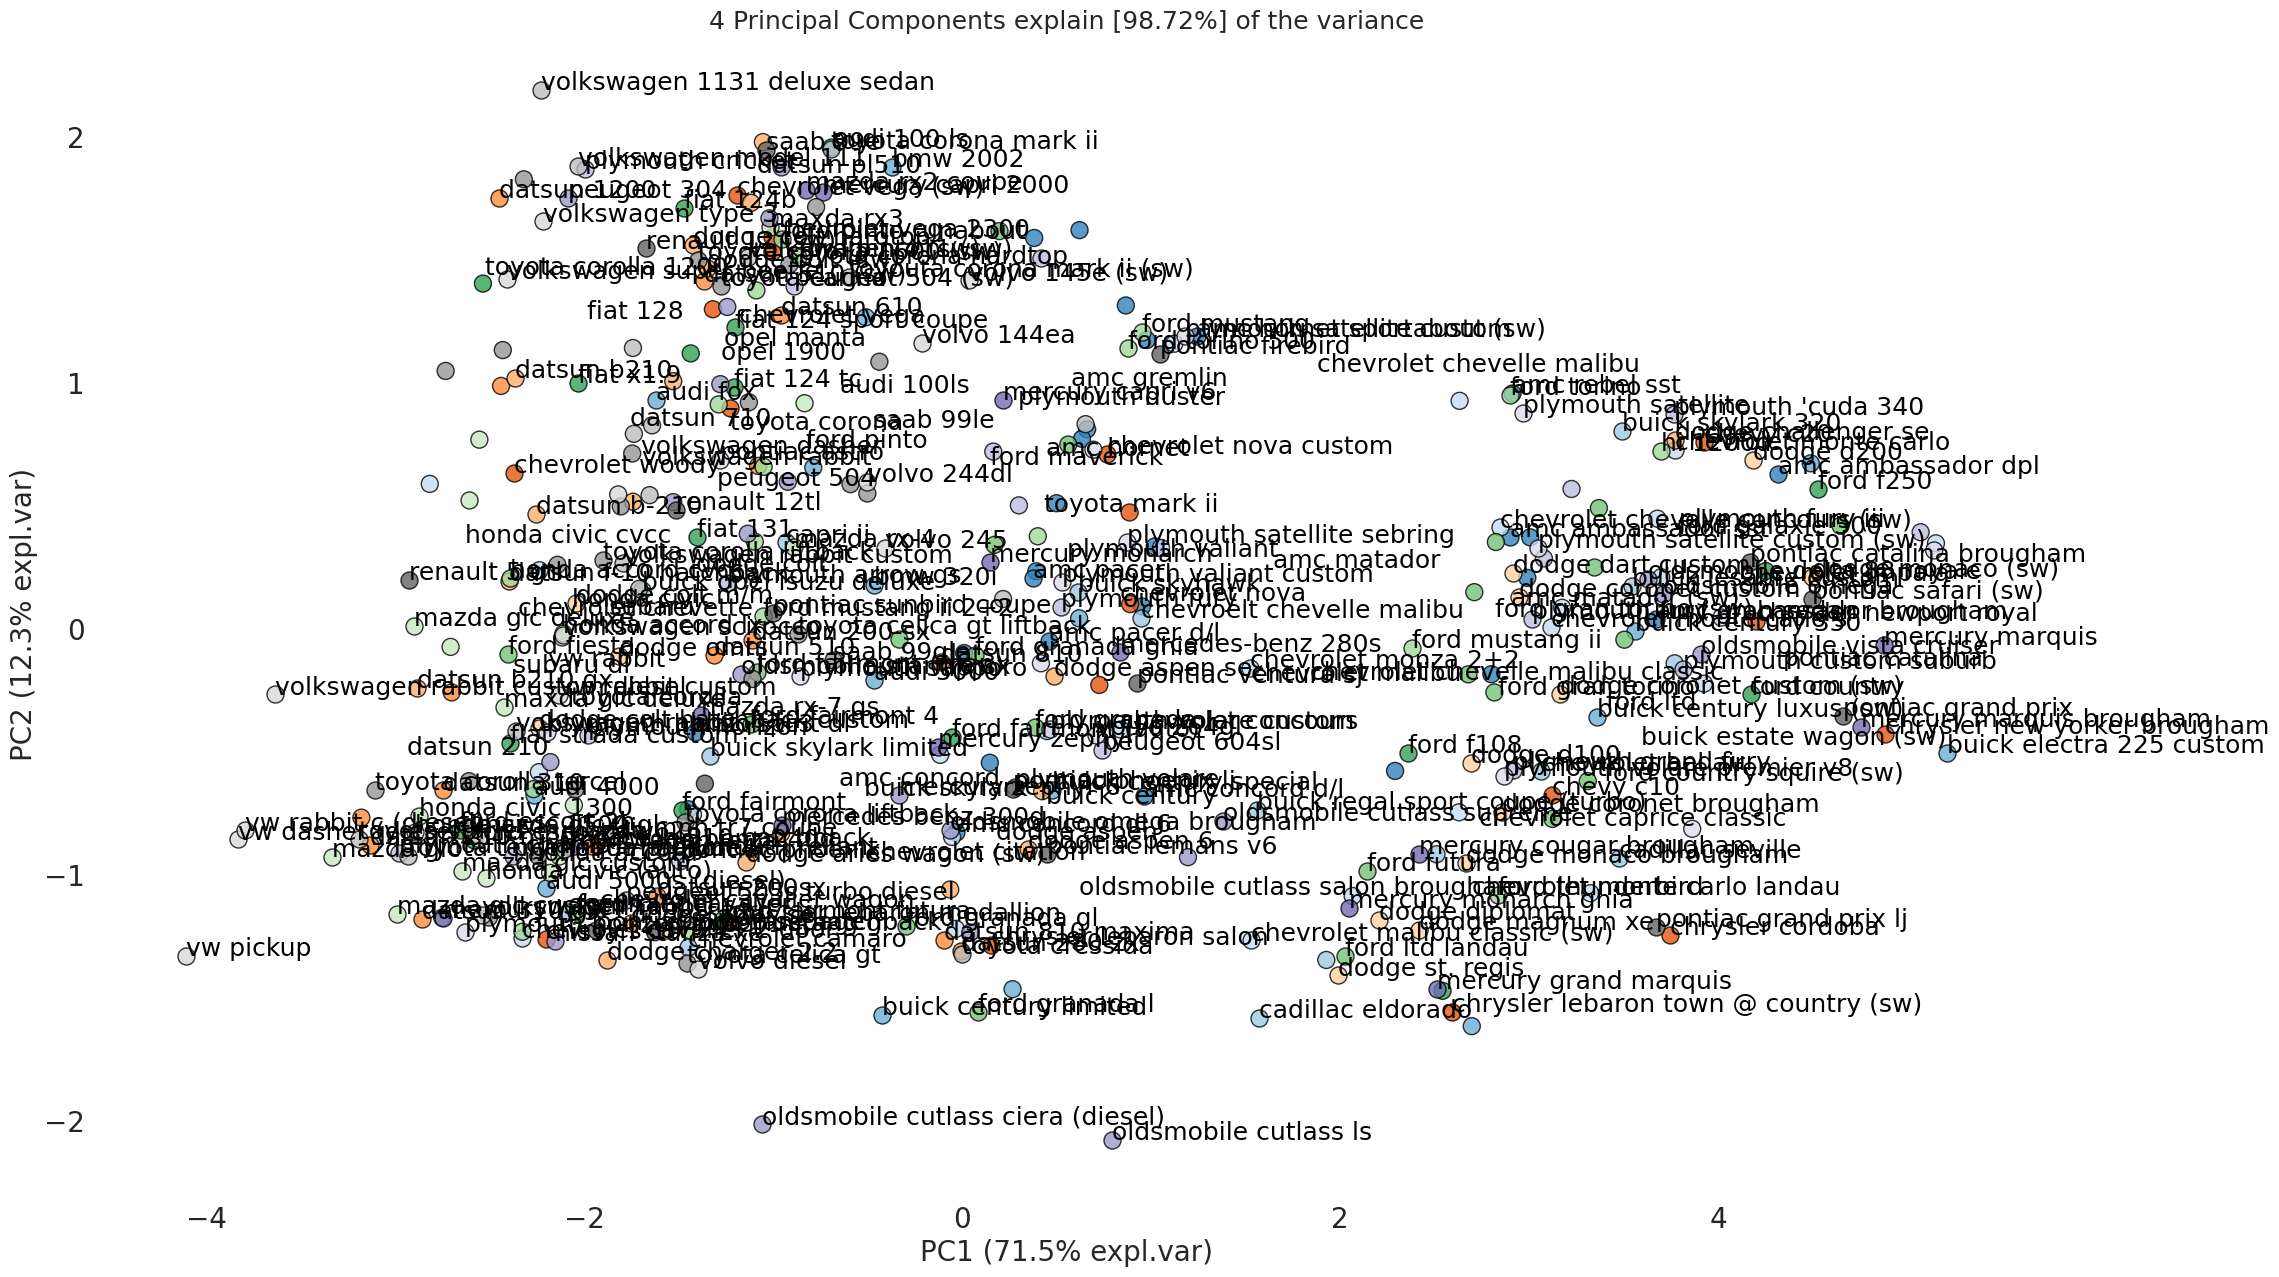

In [16]:
model.scatter(label=True, legend=False)

Biplot

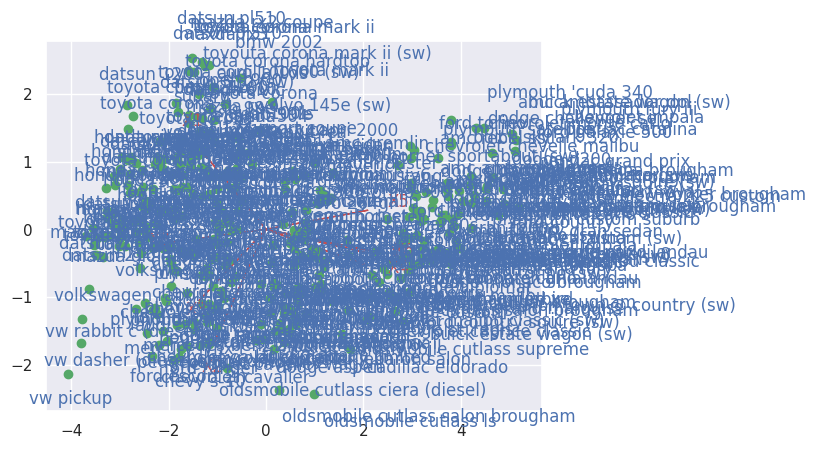

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

Principal components

Text(0.5, 1.0, 'Principal components')

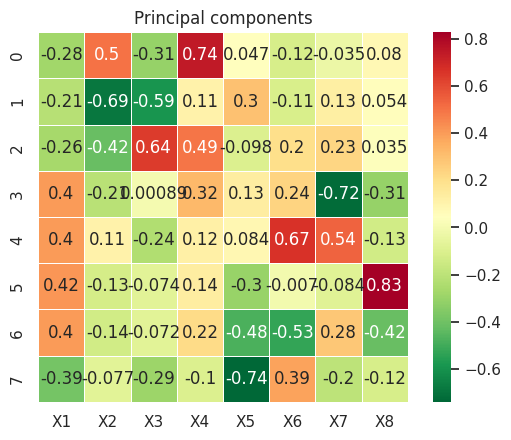

In [ ]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')
     

Using PCA Library


In [13]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [15]:
out['PC']

PC1       PC2       PC3       PC4
chevrolet chevelle malibu  2.631685  0.927853 -0.533996  0.744639
buick skylark 320          3.489341  0.804445 -0.648666  0.494197
plymouth satellite         2.966623  0.880062 -0.957519  0.718806
amc rebel sst              2.906483  0.960493 -0.582209  0.530810
ford torino                2.900120  0.951573 -1.053490  0.564380
...                             ...       ...       ...       ...
ford mustang gl           -1.439059 -1.225075 -0.310798 -0.672504
vw pickup                 -4.107225 -1.328686  1.937251  1.356788
dodge rampage             -1.564816 -1.223657 -1.927635 -0.316300
ford ranger               -2.039236 -1.150367  0.585685 -0.472923
chevy s-10                -2.199720 -1.257866  0.762553 -0.167328

[392 rows x 4 columns]

Install Pycaret

In [ ]:
# install slim version (default): if you get an error message, run it again:
!pip3 install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

#read cvs file into dataframe
df = pd.read_excel('/content/drive/MyDrive/Dataset.xls')
df.head(25)

Unnamed: 0  X1  X2    X3    X4   X5     X6  X7    X8
0      chevrolet chevelle malibu   1  70  12.0  3504  130  307.0   8  18.0
1              buick skylark 320   1  70  11.5  3693  165  350.0   8  15.0
2             plymouth satellite   1  70  11.0  3436  150  318.0   8  18.0
3                  amc rebel sst   1  70  12.0  3433  150  304.0   8  16.0
4                    ford torino   1  70  10.5  3449  140  302.0   8  17.0
5               ford galaxie 500   1  70  10.0  4341  198  429.0   8  15.0
6               chevrolet impala   1  70   9.0  4354  220  454.0   8  14.0
7              plymouth fury iii   1  70   8.5  4312  215  440.0   8  14.0
8               pontiac catalina   1  70  10.0  4425  225  455.0   8  14.0
9             amc ambassador dpl   1  70   8.5  3850  190  390.0   8  15.0
10           dodge challenger se   1  70  10.0  3563  170  383.0   8  15.0
11            plymouth 'cuda 340   1  70   8.0  3609  160  340.0   8  14.0
12         chevrolet monte carlo   1  70   9.5  3761  150  400.0   8  15.0
13       buick estate wagon (sw)   1  70  10.0  3086  225  455.0   8  14.0
14         toyota corona mark ii   3  70  15.0  2372   95  113.0   4  24.0
15               plymouth duster   1  70  15.5  2833   95  198.0   6  22.0
16                    amc hornet   1  70  15.5  2774   97  199.0   6  18.0
17                 ford maverick   1  70  16.0  2587   85  200.0   6  21.0
18                  datsun pl510   3  70  14.5  2130   88   97.0   4  27.0
19  volkswagen 1131 deluxe sedan   2  70  20.5  1835   46   97.0   4  26.0
20                   peugeot 504   2  70  17.5  2672   87  110.0   4  25.0
21                   audi 100 ls   2  70  14.5  2430   90  107.0   4  24.0
22                      saab 99e   2  70  17.5  2375   95  104.0   4  25.0
23                      bmw 2002   2  70  12.5  2234  113  121.0   4  26.0
24                   amc gremlin   1  70  15.0  2648   90  199.0   6  21.0

In [ ]:
#For Google Colab only
#from pycaret.utils import enable_colab 
#enable_colab()

In [ ]:
from pycaret.classification import *
clf_pca = setup(data=df, target='X1', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Tune the Best Model

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluate the Best Model

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

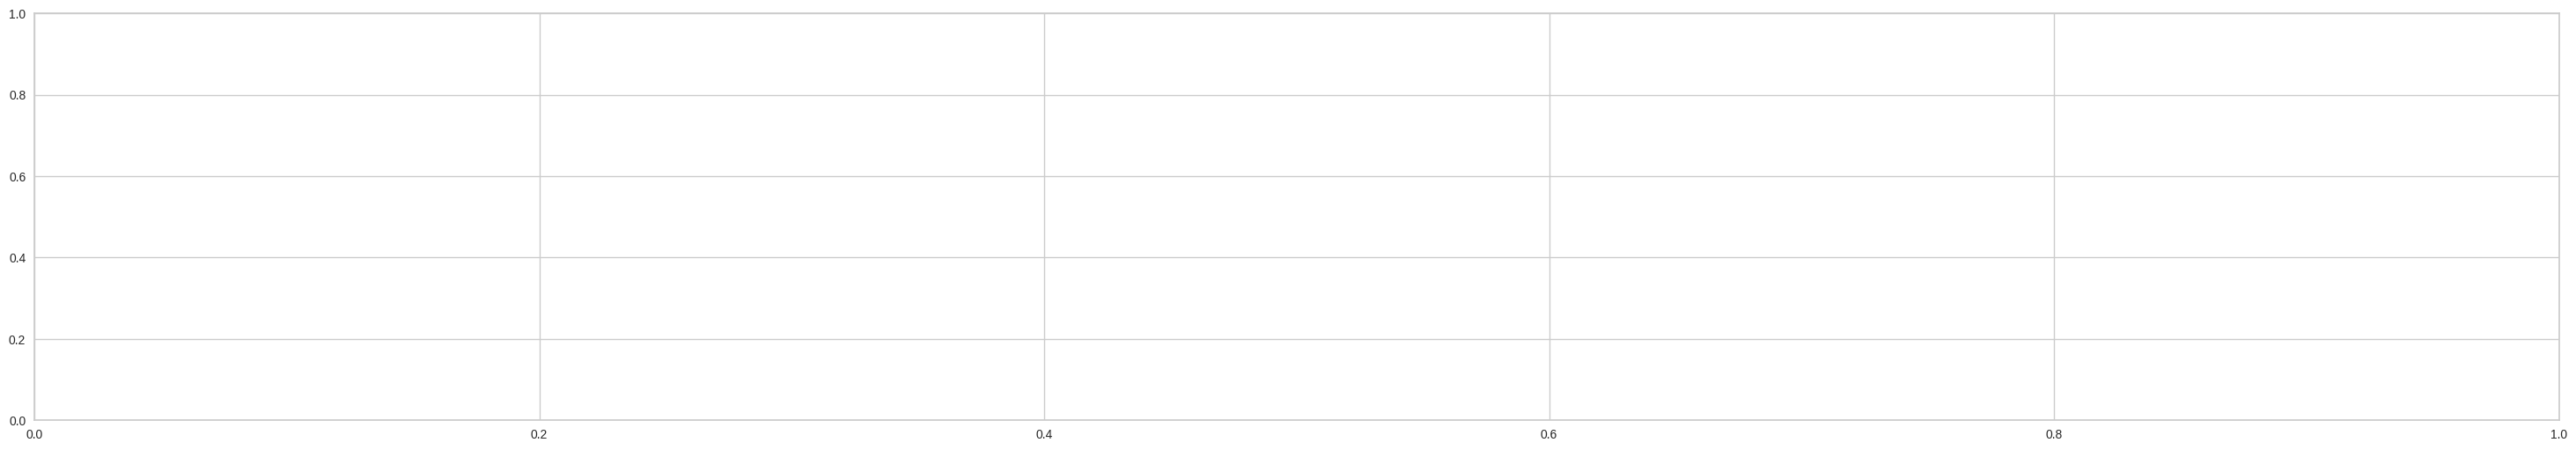

In [ ]:
evaluate_model(tuned_best_model_pca)

Explainable AI with Shapley values

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [ ]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
pip install shap pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


SHAP Summary Plot

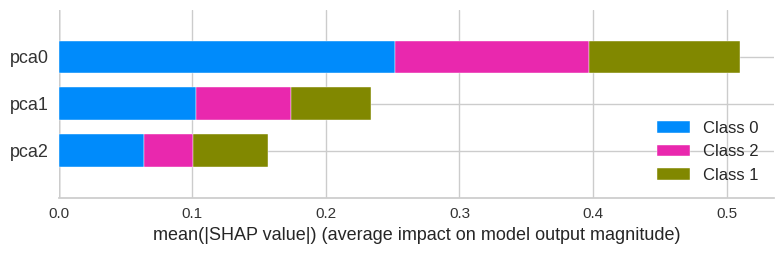

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')


In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

Visualize a single prediction

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

Visualize many predictions

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')